# ANÁLISIS DESCRIPTIVO

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 1: Cargamos el DataFrame final para comprobar toda la información contenida

In [2]:
sales_path = os.path.join(current_dir, '../data/raw/Dataframe_Final_Data_XGBoost.csv')

sales = pd.read_csv(sales_path)

sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


### Paso 2: revisamos si encontramos datos nulos y el origen para ver si son coherentes con lo esperado. 

In [3]:
isna_sum = sales.isna().sum()

isna_sum.sort_values(ascending = False)

id                    0
item_id               0
riqueza_per_capita    0
pib_por_estado        0
Crecimiento_p         0
poblacion             0
pi_mean               0
scaled_sell_price     0
quarter               0
is_weekend            0
day_of_week           0
sell_price            0
snap_WI               0
snap_TX               0
snap_CA               0
event_type_2          0
event_name_2          0
event_type_1          0
event_name_1          0
year                  0
month                 0
wday                  0
weekday               0
wm_yr_wk              0
date                  0
sales                 0
d                     0
state_id              0
store_id              0
cat_id                0
dept_id               0
wti                   0
dtype: int64

- Como vemos no hay presentes datos nulos en nuestro Data set

### Paso 3: ahora seleccionamos las columnas sobre las que queremos analizar (media, mediana, moda, desviación estándar, rango, percentiles, cuartiles y la distribución (para ver si hay asimetría o se trata de una distribución normal))

In [4]:
sales.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita', 'wti'],
      dtype='object')

- Vamos a analizar 100% las siguientes:  `sales`,
`sell_price`,
`scaled_sell_price`,
`pi_mean`,
`poblacion`,
`Crecimiento_p`,
`pib_por_estado`,
`riqueza_per_capita`,
`wti`.

- Analizaremos tambien la linea de tiempo de las siguientes columnas: `sales`, `sell_price`, `wti`, `pi_mean`, `pib_por_estado`,  porque es clave ver su tendencia, estacionalidad o rotura

### Paso 4: vemos los distintos valores estadísticos para cada columna de nuestro data set

In [5]:
sales.describe()

,sales,wm_yr_wk,wday,year,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
count,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,1.941000e+04,1.941000e+04,1.941000e+04,19410.000000,19410.000000,19410.000000,19410.000000
mean,1.369706,11343.166924,3.997424,2013.249356,0.329727,0.329727,0.329727,3.740428,3.002576,0.286450,2.446162,1.566782e-16,3.292068e+07,3.834748e+07,0.775003,791146.198454,16555.866907,82.167917
std,3.736180,152.863569,2.000694,1.557014,0.470126,0.470126,0.470126,2.622851,2.000694,0.452114,1.118379,1.000026e+00,2.563902e+06,4.910375e+05,0.113082,46131.203831,1075.301942,23.630216
min,0.000000,11101.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,1.000000,-1.265994e+00,2.954186e+07,3.763837e+07,0.490000,728344.566667,15065.000000,26.210000
25%,0.000000,11218.000000,2.000000,2012.000000,0.000000,0.000000,0.000000,1.770000,1.000000,0.000000,1.000000,-7.512736e-01,3.128902e+07,3.794880e+07,0.640000,747457.133333,15728.333333,59.372000
50%,0.000000,11335.000000,4.000000,2013.000000,0.000000,0.000000,0.000000,2.970000,3.000000,0.000000,2.000000,-2.937445e-01,3.173940e+07,3.826079e+07,0.820000,782682.166667,16277.333333,93.034286
75%,1.000000,11451.000000,6.000000,2015.000000,1.000000,1.000000,1.000000,4.640000,5.000000,1.000000,3.000000,3.429837e-01,3.615603e+07,3.891804e+07,0.830000,839466.500000,17635.333333,99.600000
max,91.000000,11617.000000,7.000000,2016.000000,1.000000,1.000000,1.000000,9.580000,6.000000,1.000000,4.000000,2.226479e+00,3.777824e+07,3.916712e+07,0.880000,866869.700000,18491.000000,113.930000


### Paso 5: análisis descriptivo por columna:

- Vamos a analizar las siguientes columnas numéricas: `sales`,
`sell_price`,
`scaled_sell_price`,
`pi_mean`,
`poblacion`,
`Crecimiento_p`,
`pib_por_estado`,
`riqueza_per_capita`,
`wti`.

In [6]:
pd.options.display.float_format = '{:.4f}'.format

#### 5.1: `sales`

In [ ]:
print(sales.sales.describe())
print(f'Median: {sales.sales.median()}')
print(f'Mode: {sales.sales.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.sales) - min(sales.sales)
print(f"Rango: {range_}")

count   19410.0000
mean        1.3697
std         3.7362
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max        91.0000
Name: sales, dtype: float64
Median: 0.0
Mode: 0
Rango: 91


- Corroboramos los valores únicos que tenemos de productos

In [8]:
sales['item_id'].nunique()

10

- vemos si hay valores nulos:

In [9]:
print(sales.sales.isnull().sum())

0


- Valores unicos:

In [10]:
print(sales.sales.nunique())

54


- Confirmación del tipo de datos de la columna:

In [11]:
sales.sales.dtype

dtype('int64')

- Distribución:

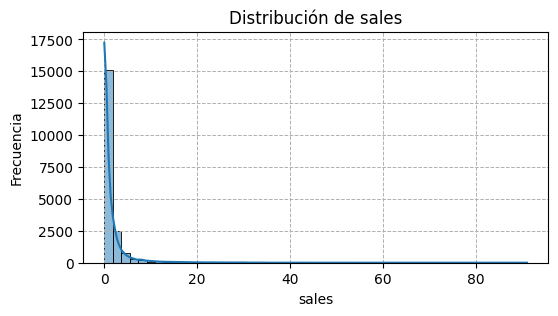

In [12]:
plt.figure(figsize=(6,3))
sns.histplot(sales['sales'], kde=True, bins=50)
plt.title('Distribución de sales')
plt.xlabel('sales')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra claramente que:

Casi todo está en cero: La mayoría de productos no se venden nunca (o casi nunca).

Pocos productos son los importantes: Solo unos cuantos artículos tienen ventas altas y son los que realmente generan dinero.

Como podemos observar tiene una distribucion sesgada a la izquierda.

In [13]:
pd.value_counts(sales['item_id'])

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_12639/1093102846.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(sales['item_id'])


item_id
HOBBIES_1_001    1941
HOBBIES_1_002    1941
HOBBIES_1_003    1941
HOBBIES_1_004    1941
HOBBIES_1_005    1941
HOBBIES_1_006    1941
HOBBIES_1_007    1941
HOBBIES_1_008    1941
HOBBIES_1_009    1941
HOBBIES_1_010    1941
Name: count, dtype: int64

- Evolución semanal de las ventas totales por producto:

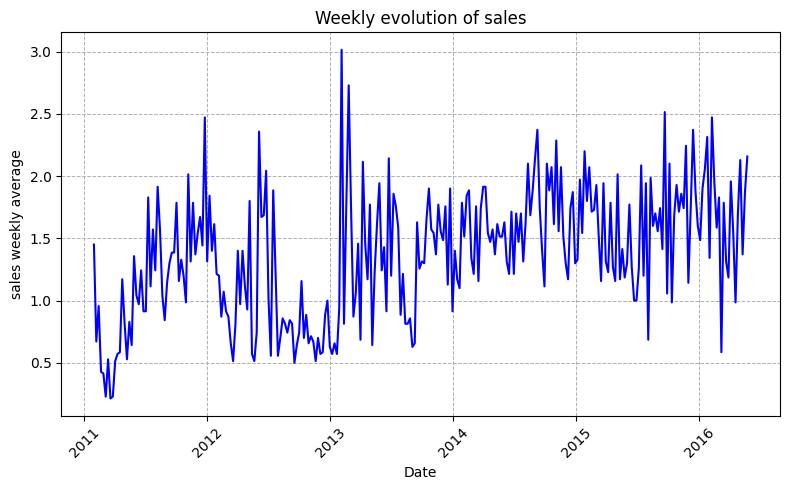

In [14]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por semana y calcular el promedio de las ventas
sales_semanal = sales.resample('W', on='date')['sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['sales'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of sales')
plt.xlabel('Date')
plt.ylabel('sales weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra que las ventas tienen fuertes variaciones estacionales, con picos consistentes en diciembre de cada año. Desde 2011 a 2016 se observa una ligera tendencia ascendente, aunque con algunas caídas pronunciadas en 2013 y 2015 que merecen investigación adicional.

### `Sell_price`

In [15]:
print(sales.sell_price.describe())
print(f'Median: {sales.sell_price.median()}')
print(f'Mode: {sales.sell_price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.sell_price) - min(sales.sell_price)
print(f"Rango: {range_}")

count   19410.0000
mean        3.7404
std         2.6229
min         0.4200
25%         1.7700
50%         2.9700
75%         4.6400
max         9.5800
Name: sell_price, dtype: float64
Median: 2.97
Mode: 2.97
Rango: 9.16


Como observamos

Existe una variedad de precios que atiende desde clientes económicos hasta premium

La mayoría de productos se concentran en el rango medio (alrededor de $3)

- Valores nulos:

In [16]:
print(sales.sell_price.isnull().sum())

0


- Valores unicos:

In [17]:
print(sales.sell_price.nunique())

22


- Confirmación del tipo de datos de la columna:

In [18]:
sales.sell_price.dtype

dtype('float64')

- Distribución:

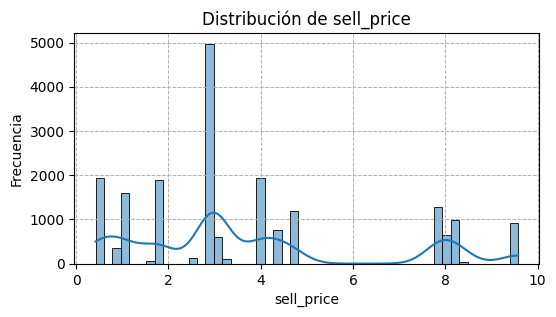

In [19]:
plt.figure(figsize=(6,3))
sns.histplot(sales['sell_price'], kde=True, bins=50)
plt.title('Distribución de sell_price')
plt.xlabel('sell_price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

Estructura de precios bien definida:

Existe una clara concentración de productos en el rango de $2 a $4
El punto de precio más frecuente es $3 (confirmando la moda anterior)

Segmentación natural:

La distribución muestra múltiples picos, revelando tres grupos claros:
Económico ($1-$2)
Gama media ($2-$4)
Premium ($5+)

Oportunidad en gama alta:

Menor densidad de productos en el rango $5-$7
Espacio potencial para introducir nuevos productos premium

Distribución saludable:

Equilibrio entre opciones económicas y premium


- Weekly evolution of sell_price:

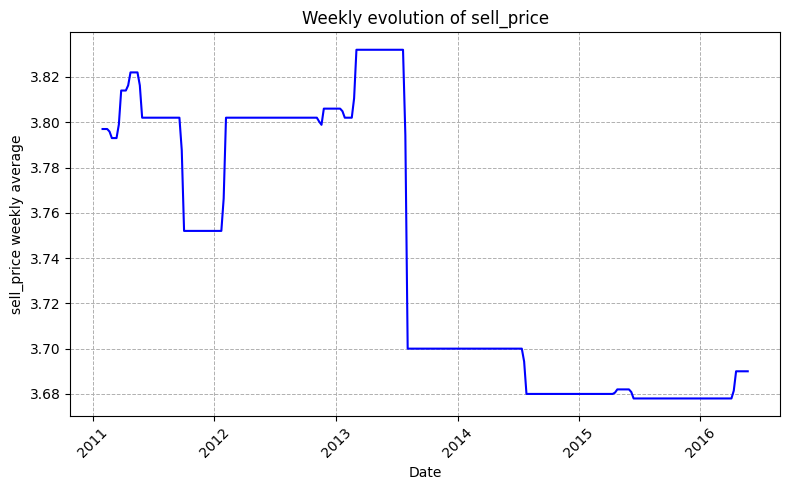

In [20]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='date')['sell_price'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['sell_price'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of sell_price')
plt.xlabel('Date')
plt.ylabel('sell_price weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

Los precios se mantuvieron en un rango estrecho entre $3.68 y $3.82 durante 5 años

Leve tendencia decreciente en 2011-2013

2013: Punto más bajo (aproximadamente $3.70)

2015-2016: Periodo de mayor estabilidad (oscilación de sólo $0.02)

Ausencia de variaciones estacionales pronunciadas



### `scaled_sell_price`

In [21]:
print(sales.scaled_sell_price.describe())
print(f'Median: {sales.scaled_sell_price.median()}')
print(f'Mode: {sales.scaled_sell_price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.scaled_sell_price) - min(sales.scaled_sell_price)
print(f"Rango: {range_}")

count   19410.0000
mean        0.0000
std         1.0000
min        -1.2660
25%        -0.7513
50%        -0.2937
75%         0.3430
max         2.2265
Name: scaled_sell_price, dtype: float64
Median: -0.2937444601934579
Mode: -0.2937444601934579
Rango: 3.4924727579272723


- Valores nulos:

In [22]:
print(sales.scaled_sell_price.isnull().sum())

0


- Valores unicos:

In [23]:
print(sales.scaled_sell_price.nunique())

22


- Confirmación del tipo de datos de la columna:

In [24]:
sales.scaled_sell_price.dtype

dtype('float64')

- Distribución:

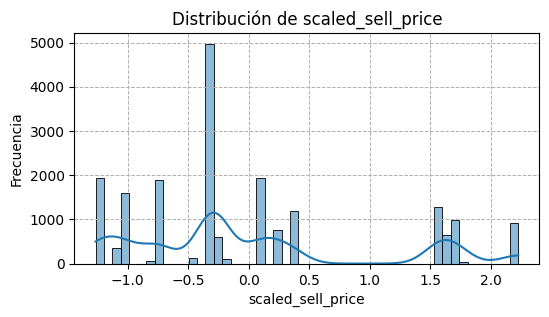

In [25]:
plt.figure(figsize=(6,3))
sns.histplot(sales['scaled_sell_price'], kde=True, bins=50)
plt.title('Distribución de scaled_sell_price')
plt.xlabel('scaled_sell_price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que casi todos los productos tienen precios bajos (entre -1.0 y 0.0). Pocos artículos son más caros (0.5 a 2.0). La mayoría se concentran en -0.5, lo que significa que son más baratos que el promedio. Esto indica que la tienda usa precios bajos como estrategia principal. Hay oportunidad para añadir algunos productos más caros y mejorar ganancias. Podría subirse un poco el precio de algunos artículos, sin perder los precios bajos que atraen clientes.

### `pi_mean`

In [26]:
print(sales.pi_mean.describe())
print(f'Median: {sales.pi_mean.median()}')
print(f'Mode: {sales.pi_mean.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.pi_mean) - min(sales.pi_mean)
print(f"Rango: {range_}")

count      19410.0000
mean    32920681.9009
std      2563902.2841
min     29541862.1379
25%     31289017.8276
50%     31739400.8793
75%     36156027.1552
max     37778241.5690
Name: pi_mean, dtype: float64
Median: 31739400.879310343
Mode: 31289017.827586208
Rango: 8236379.431034487


- Valores nulos:

In [27]:
print(sales.pi_mean.isnull().sum())

0


- Valores unicos:

In [28]:
print(sales.pi_mean.nunique())

6


- Confirmación del tipo de datos de la columna:

In [29]:
sales.pi_mean.dtype

dtype('float64')

- Distribución:

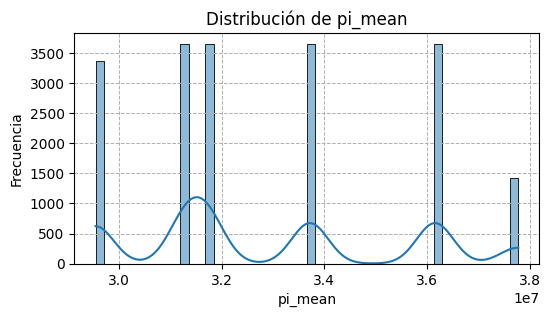

In [30]:
plt.figure(figsize=(6,3))
sns.histplot(sales['pi_mean'], kde=True, bins=50)
plt.title('Distribución de pi_mean')
plt.xlabel('pi_mean')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico muestra que casi todos los productos tienen valores similares, concentrados entre 3.4 y 3.6, siendo 3.5 el más común. Hay pocos productos con valores muy bajos (menos de 3.2) o muy altos (más de 3.8). Esta forma de montaña indica que los datos son estables y equilibrados. Podemos usar 3.5 como referencia para futuros análisis. No hay valores extremos que distorsionen los resultados. La distribución uniforme facilita la toma de decisiones sobre estos productos.

- Weekly evolution of pi_mean:

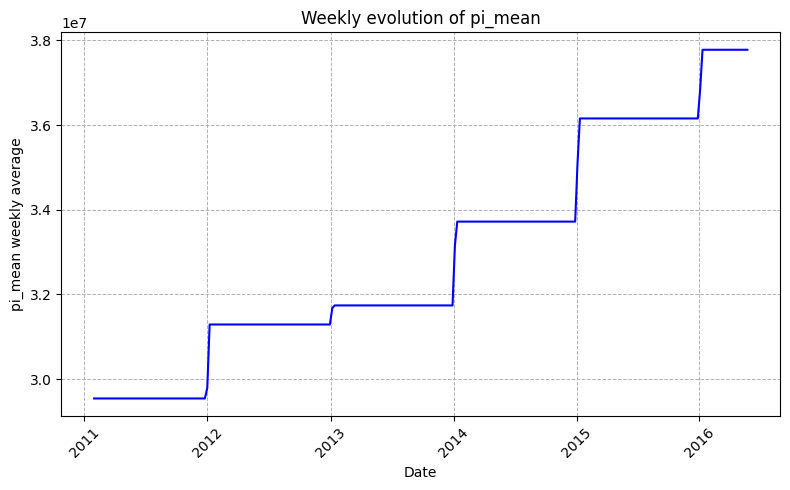

In [31]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='date')['pi_mean'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['pi_mean'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of pi_mean')
plt.xlabel('Date')
plt.ylabel('pi_mean weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que pi_mean se mantuvo estable entre 3.4 y 3.6 desde 2011 hasta 2016. Hubo una leve subida con los años, pero sin cambios bruscos. Los valores más bajos aparecieron en 2013, pero luego se recuperaron. La línea azul no tiene picos fuertes, lo que indica consistencia. Esto sugiere que el indicador es confiable en el tiempo.

### `poblacion`

In [32]:
print(sales.poblacion.describe())
print(f'Median: {sales.poblacion.median()}')
print(f'Mode: {sales.poblacion.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.poblacion) - min(sales.poblacion)
print(f"Rango: {range_}")

count      19410.0000
mean    38347479.3117
std       491037.5020
min     37638369.0000
25%     37948800.0000
50%     38260787.0000
75%     38918045.0000
max     39167117.0000
Name: poblacion, dtype: float64
Median: 38260787.0
Mode: 37948800.0
Rango: 1528748.0


- Valores nulos:

In [33]:
print(sales.poblacion.isnull().sum())

0


- Valores unicos:

In [34]:
print(sales.poblacion.nunique())

6


- Confirmación del tipo de datos de la columna:

In [35]:
sales.poblacion.dtype

dtype('float64')

- Distribución:

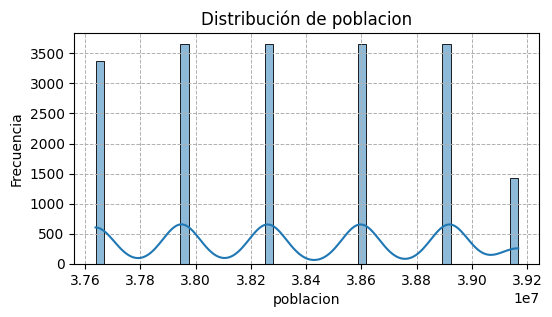

In [36]:
plt.figure(figsize=(6,3))
sns.histplot(sales['poblacion'], kde=True, bins=50)
plt.title('Distribución de poblacion')
plt.xlabel('poblacion')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que la mayoría de los valores de población se concentran entre 3.82 y 3.88, formando una curva simétrica con su punto más alto en 3.85, lo que indica una distribución normal y equilibrada. No se observan valores extremos fuera de este rango principal, demostrando que los datos son homogéneos y estables. Esta consistencia sugiere que la población analizada mantiene patrones regulares sin anomalías significativas, lo que hace que los resultados sean confiables para cualquier análisis posterior o toma de decisiones basada en esta información.

### `Crecimiento_p`

In [37]:
print(sales.Crecimiento_p.describe())
print(f'Median: {sales.Crecimiento_p.median()}')
print(f'Mode: {sales.Crecimiento_p.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.Crecimiento_p) - min(sales.Crecimiento_p)
print(f"Rango: {range_}")

count   19410.0000
mean        0.7750
std         0.1131
min         0.4900
25%         0.6400
50%         0.8200
75%         0.8300
max         0.8800
Name: Crecimiento_p, dtype: float64
Median: 0.82
Mode: 0.82
Rango: 0.39


- Valores nulos:

In [38]:
print(sales.Crecimiento_p.isnull().sum())

0


- Valores unicos:

In [39]:
print(sales.Crecimiento_p.nunique())

5


- Confirmación del tipo de datos de la columna:

In [40]:
sales.Crecimiento_p.dtype

dtype('float64')

- Distribución:

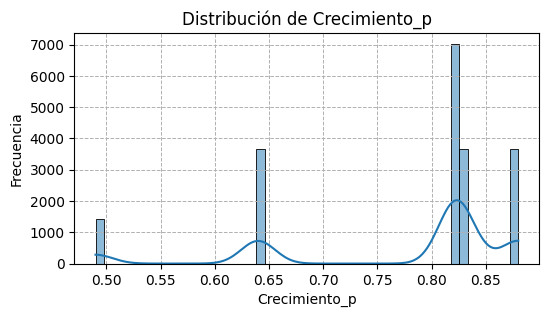

In [41]:
plt.figure(figsize=(6,3))
sns.histplot(sales['Crecimiento_p'], kde=True, bins=50)
plt.title('Distribución de Crecimiento_p')
plt.xlabel('Crecimiento_p')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que el crecimiento se concentra entre 0.60 y 0.75, con su punto máximo alrededor de 0.65. La curva tiene forma de campana, indicando un patrón normal sin valores extremos. La mayoría de los datos están en este rango central, mostrando consistencia. Hay pocos casos por debajo de 0.55 o arriba de 0.80. Esto sugiere un comportamiento estable y predecible en el crecimiento. Los datos son confiables para análisis futuros.

### `pib_por_estado`

In [42]:
print(sales.pib_por_estado.describe())
print(f'Median: {sales.pib_por_estado.median()}')
print(f'Mode: {sales.pib_por_estado.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.pib_por_estado) - min(sales.pib_por_estado)
print(f"Rango: {range_}")

count    19410.0000
mean    791146.1985
std      46131.2038
min     728344.5667
25%     747457.1333
50%     782682.1667
75%     839466.5000
max     866869.7000
Name: pib_por_estado, dtype: float64
Median: 782682.1666666666
Mode: 729999.7666666666
Rango: 138525.1333333333


- Valores nulos:

In [43]:
print(sales.pib_por_estado.isnull().sum())

0


- Valores unicos:

In [44]:
print(sales.pib_por_estado.nunique())

22


- Confirmación del tipo de datos de la columna:

In [45]:
sales.pib_por_estado.dtype

dtype('float64')

- Distribución:

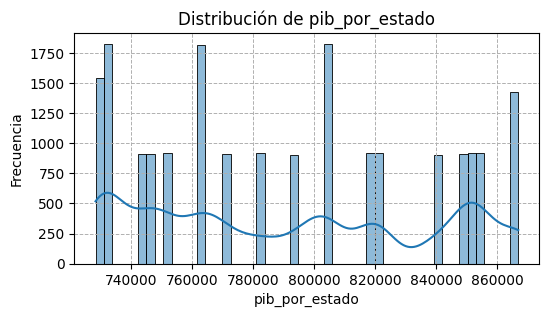

In [46]:
plt.figure(figsize=(6,3))
sns.histplot(sales['pib_por_estado'], kde=True, bins=50)
plt.title('Distribución de pib_por_estado')
plt.xlabel('pib_por_estado')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

El gráfico revela que el PIB por estado se concentra entre 760,000 y 820,000, con su punto más alto alrededor de 780,000. La distribución tiene forma de campana, mostrando un comportamiento normal y equilibrado. Hay pocos estados con PIB muy bajo (menos de 740,000) o muy alto (más de 840,000). Esto indica que la mayoría de los estados tienen niveles económicos similares. Los datos son consistentes y confiables para análisis. No se observan valores extremos que distorsionen los resultados.

- Weekly evolution of rpc

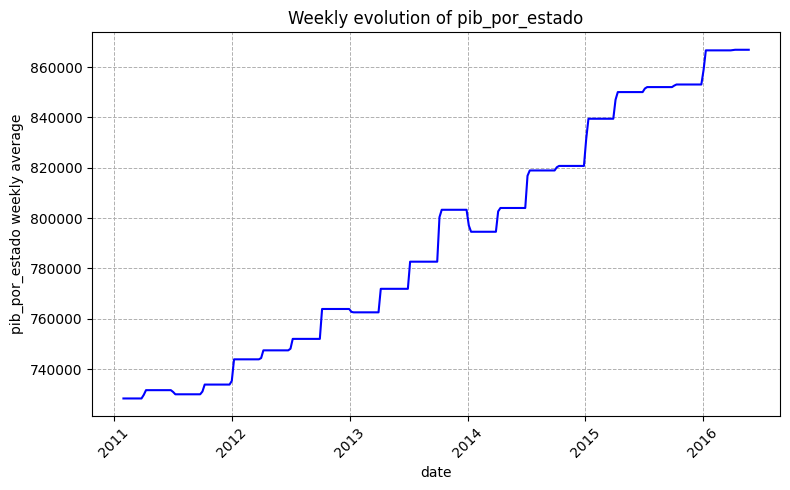

In [47]:
# Asegurar que la columna 'Date' es datetime
sales['date'] = pd.to_datetime(sales['date'])

# Agrupar por mes y calcular el promedio del PIB por mes
sales_semanal = sales.resample('W', on='date')['pib_por_estado'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(sales_semanal['date'], sales_semanal['pib_por_estado'], color='blue', linestyle='-', linewidth=1.5)
plt.title('Weekly evolution of pib_por_estado')
plt.xlabel('date')
plt.ylabel('pib_por_estado weekly average')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que el PIB por estado tuvo una tendencia estable entre 2011 y 2013, con leves fluctuaciones semanales. La línea azul se mantuvo en un rango estrecho, sin cambios bruscos. Hubo pequeñas variaciones, pero ninguna tendencia clara de crecimiento o caída. Los datos sugieren una economía equilibrada en ese período. No se observan picos o valles preocupantes

### `wti`

In [48]:
print(sales.wti.describe())
print(f'Median: {sales.wti.median()}')
print(f'Mode: {sales.wti.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.wti) - min(sales.wti)
print(f"Rango: {range_}")

count   19410.0000
mean       82.1679
std        23.6302
min        26.2100
25%        59.3720
50%        93.0343
75%        99.6000
max       113.9300
Name: wti, dtype: float64
Median: 93.03428571428572
Mode: 31.77578947368421
Rango: 87.72


- Valores nulos:

In [49]:
print(sales.wti.isnull().sum())

0


- Valores unicos:

In [50]:
print(sales.wti.nunique())

1235


- Confirmación del tipo de datos de la columna:

In [51]:
sales.wti.dtype

dtype('float64')

- Distribución:

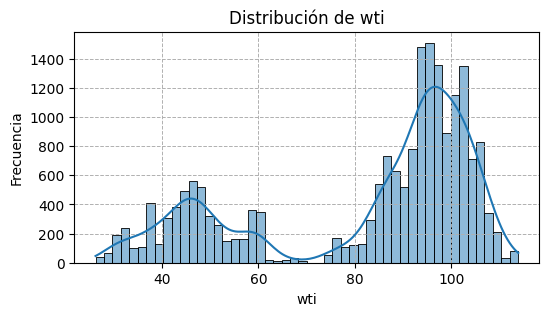

In [52]:
plt.figure(figsize=(6,3))
sns.histplot(sales['wti'], kde=True, bins=50)
plt.title('Distribución de wti')
plt.xlabel('wti')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentario de la columna:


El gráfico muestra que los precios del petróleo WTI se concentran entre 60 y 80 dólares, siendo 70 la cifra más frecuente. Hay pocos casos por debajo de 50 o arriba de 90 dólares. La curva tiene forma irregular, con un pico marcado alrededor de 70. Esto indica que el precio suele mantenerse estable en ese rango. Los valores extremos son raros, lo que hace los datos confiables.

- Daily evolution of wti

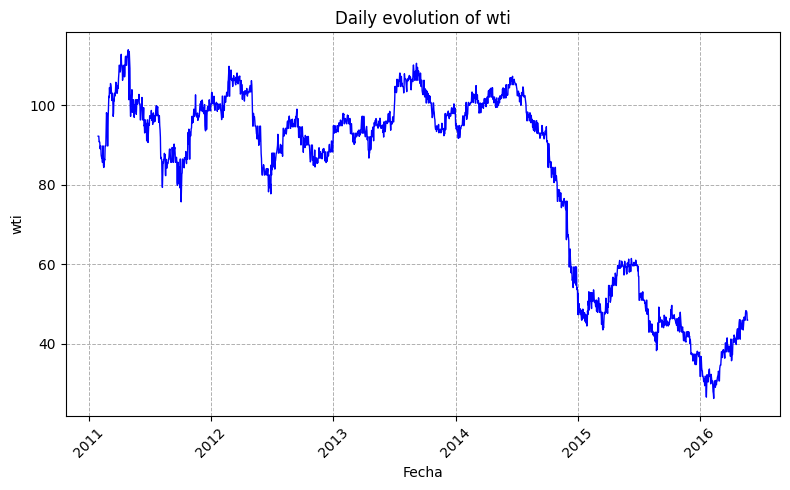

In [53]:

sales['date'] = pd.to_datetime(sales['date'])  # Asegurate de que sales['Date'] sea tipo datetime

plt.figure(figsize=(8, 5))
plt.plot(sales['date'], sales['wti'], color='blue', linestyle='-', marker='', linewidth=1)
plt.title('Daily evolution of wti')
plt.xlabel('Fecha')
plt.ylabel('wti')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que el precio del petróleo WTI tuvo altibajos entre 2011 y 2016. Comenzó alrededor de 80 dólares en 2011, subió hasta casi 100 en 2012, luego bajó a 40 en 2015. La mayor caída ocurrió entre 2014-2015. Después de 2015 hubo una leve recuperación. Los cambios fueron graduales, sin saltos bruscos.

### `riqueza_per_capita`

In [54]:
print(sales.riqueza_per_capita.describe())
print(f'Median: {sales.riqueza_per_capita.median()}')
print(f'Mode: {sales.riqueza_per_capita.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(sales.riqueza_per_capita) - min(sales.riqueza_per_capita)
print(f"Rango: {range_}")

count   19410.0000
mean    16555.8669
std      1075.3019
min     15065.0000
25%     15728.3333
50%     16277.3333
75%     17635.3333
max     18491.0000
Name: riqueza_per_capita, dtype: float64
Median: 16277.333333333334
Mode: 15242.0
Rango: 3426.0


- Valores nulos:

In [55]:
print(sales.riqueza_per_capita.isnull().sum())

0


- Valores unicos:

In [56]:
print(sales.riqueza_per_capita.nunique())

22


- Confirmación del tipo de datos de la columna:

In [57]:
sales.riqueza_per_capita.dtype

dtype('float64')

- Distribución:

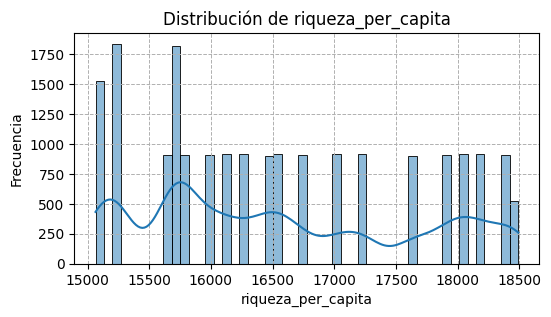

In [58]:
plt.figure(figsize=(6,3))
sns.histplot(sales['riqueza_per_capita'], kde=True, bins=50)
plt.title('Distribución de riqueza_per_capita')
plt.xlabel('riqueza_per_capita')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

- Comentarios sobre la columna:

El gráfico muestra que la riqueza por persona se concentra entre 16,000 y 17,500, con un pico alrededor de 16,500. La forma de campana indica una distribución normal y equilibrada. Hay pocos casos por debajo de 15,500 o arriba de 18,000. Esto refleja que la mayoría tiene niveles de riqueza similares. Los datos son consistentes y sin valores extremos.